In [ ]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
species = pd.Series(['Human', 'Olive baboon', 'House mouse', 'Domestic dog', 'Bovine, Hereford cattle', 'Gray short-tailed opossum'])
latin = pd.Series(['Homo sapiens', 'Papio anubis', 'Mus musculus', 'Canis lupus familiaris', 'Bos taurus', 'Monodelphis domestica'])
class_tax = pd.Series(['Mammalia']*6)
clade = pd.Series(['Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Ameridelphia'])
order = pd.Series(['Primates', 'Primates', 'Rodentia', 'Carnivora', 'Artiodactyla', 'Didelphimorphia'])
subdivision = pd.Series(['Euarchontoglires', 'Euarchontoglires', 'Euarchontoglires', 'Laurasiatheria', 'Laurasiatheria', 'Phalangeriformes'])

table_taxonomy = pd.DataFrame({'species':species,
                               'latin':latin,
                               'taxonomy_class':class_tax,
                               'clade':clade,
                               'order':order,
                               'sub class':subdivision}).set_index(['taxonomy_class', 'clade', 'sub class', 'order', 'species'])

display(table_taxonomy)

latin
taxonomy_class clade         sub class        order           species                                          
Mammalia       Boreoeutheria Euarchontoglires Primates        Human                                Homo sapiens
                                                              Olive baboon                         Papio anubis
                                              Rodentia        House mouse                          Mus musculus
                             Laurasiatheria   Carnivora       Domestic dog               Canis lupus familiaris
                                              Artiodactyla    Bovine, Hereford cattle                Bos taurus
               Ameridelphia  Phalangeriformes Didelphimorphia Gray short-tailed opossum   Monodelphis domestica

In [ ]:
import plotly.express as px
import networkx as nx
! apt install libgraphviz-dev
! pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


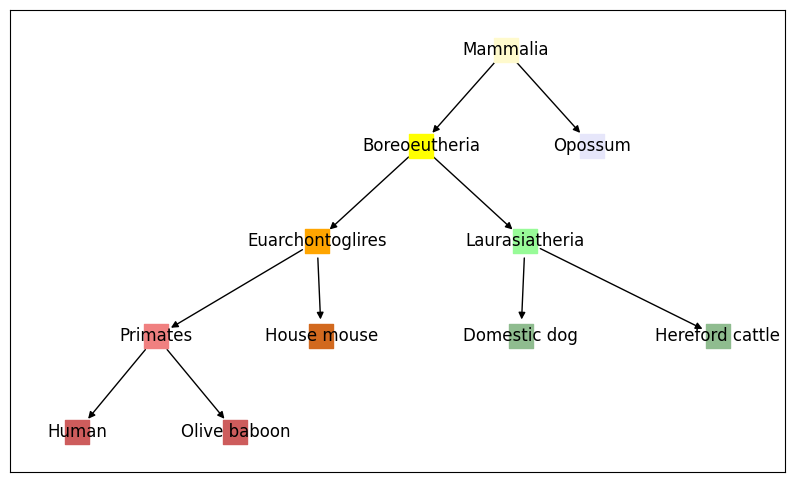

In [ ]:
G = nx.DiGraph()
table = table_taxonomy.drop('latin', axis = 1)
for (taxonomy_class, clade, sub_class, order, species) in table.index:
  if species == 'Gray short-tailed opossum':
    species = 'Opossum'
  if species == 'Bovine, Hereford cattle':
    species = 'Hereford cattle'
  G.add_edge(taxonomy_class, clade, shape='square')
  G.add_edge(clade, sub_class)
  G.add_edge(sub_class, order)
  G.add_edge(order, species)
G.add_edge('Laurasiatheria', 'Domestic dog')
G.add_edge('Laurasiatheria', 'Hereford cattle')
G.add_edge('Euarchontoglires', 'House mouse')
G.add_edge('Mammalia', 'Opossum')
node_list = list(G.nodes())
for node in node_list:
  if node in ['Rodentia', 'Artiodactyla', 'Didelphimorphia', 'Carnivora', 'Phalangeriformes', 'Ameridelphia']:
    G.remove_node(node)
(figure, axes) = plt.subplots(figsize=(10, 6))
coordinates = nx.nx_agraph.graphviz_layout(G, prog="dot")
colors = {'Boreoeutheria':'yellow','Laurasiatheria':'palegreen', 'Human':'indianred', 'Olive baboon':'indianred', 'House mouse': 'chocolate', 'Primates':'lightcoral', 'Domestic dog':'darkseagreen', 'Hereford cattle': 'darkseagreen', 'Mammalia':'lemonchiffon', 'Euarchontoglires':'orange', 'Opossum':'lavender'}
node_colors = [colors.get(node, 'gray') for node in G.nodes()]
nx.draw_networkx(G, coordinates, ax=axes, node_color = node_colors, node_shape='s')